In [ ]:
# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
### Generate the Cities List by Using the `citipy` Library

In [ ]:
---

In [2]:

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 587


In [ ]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | saratamata
City not found. Skipping...
Processing Record 7 of Set 1 | tofol
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | acajutla
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | greymouth
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | amga
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | rhinelander
Processing Record 20 of Set 1 | ilhabela
Processing Record 21 of Set 1 | muisne
Processing 

In [11]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [13]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acarau,-2.8856,-40.1200,302.89,71,0,4.45,BR,1714072890
1,georgetown,5.4112,100.3354,300.59,84,100,1.74,MY,1714072677
2,mount gambier,-37.8333,140.7667,285.67,62,100,2.60,AU,1714072690
3,keflavik,64.0049,-22.5624,280.36,80,92,7.39,IS,1714072891
4,wailua homesteads,22.0669,-159.3780,295.47,81,52,6.94,US,1714072891


In [21]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,302.89,71,0,4.45,BR,1714072890
1,georgetown,5.4112,100.3354,300.59,84,100,1.74,MY,1714072677
2,mount gambier,-37.8333,140.7667,285.67,62,100,2.60,AU,1714072690
3,keflavik,64.0049,-22.5624,280.36,80,92,7.39,IS,1714072891
4,wailua homesteads,22.0669,-159.3780,295.47,81,52,6.94,US,1714072891


In [ ]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

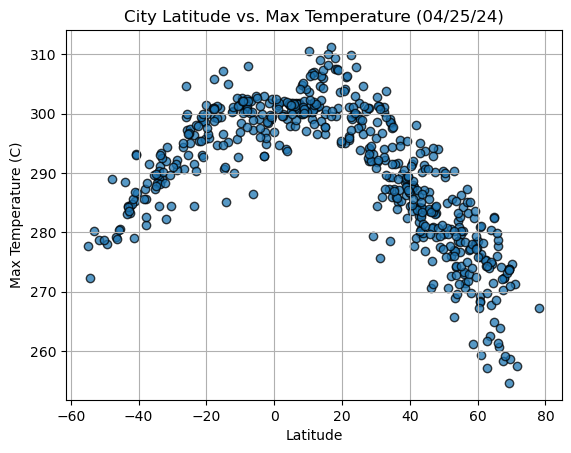

In [28]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
⁠ #### Latitude Vs. Humidity

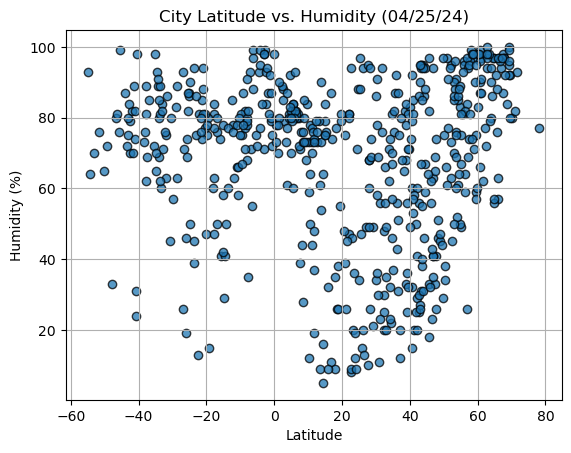

In [30]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


In [ ]:
⁠ #### Latitude Vs. Cloudiness

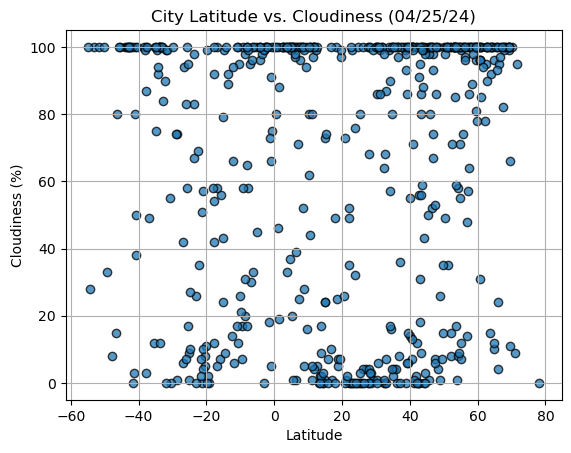

In [31]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


In [ ]:
⁠ #### Latitude vs. Wind Speed Plot

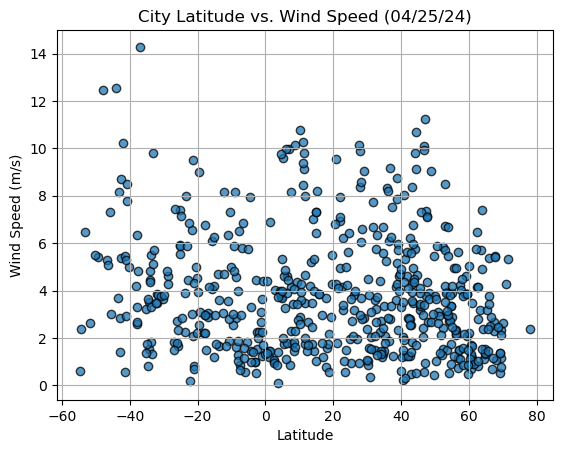

In [32]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [33]:
---

## Requirement 2: Compute Linear Regression for Each Relationship

In [50]:
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print r-squared value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,5.4112,100.3354,300.59,84,100,1.74,MY,1714072677
3,keflavik,64.0049,-22.5624,280.36,80,92,7.39,IS,1714072891
4,wailua homesteads,22.0669,-159.3780,295.47,81,52,6.94,US,1714072891
5,tofol,5.3248,163.0078,301.58,82,20,9.61,FM,1714072891
7,acajutla,13.5928,-89.8275,304.72,61,2,5.22,SV,1714072892


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,302.89,71,0,4.45,BR,1714072890
2,mount gambier,-37.8333,140.7667,285.67,62,100,2.60,AU,1714072690
6,adamstown,-25.0660,-130.1015,296.55,87,9,7.41,PN,1714072892
8,edinburgh of the seven seas,-37.0676,-12.3116,291.51,85,49,14.28,SH,1714072892
9,margaret river,-33.9500,115.0667,284.35,69,100,4.43,AU,1714072892


In [68]:
⁠###  Temperature vs. Latitude Linear Regression Plot

SyntaxError: invalid non-printable character U+2060 (3733515615.py, line 1)

The r-value is: -0.879324392213188


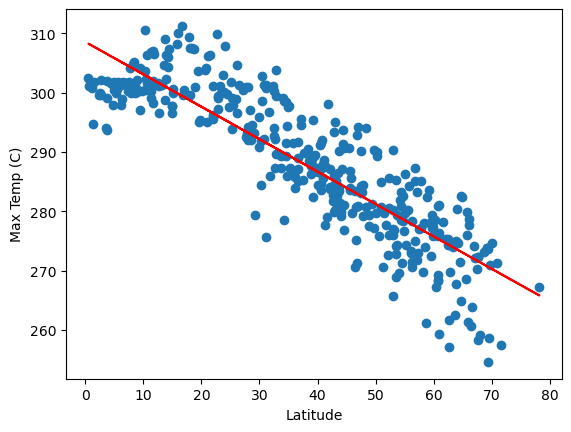

In [69]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],  "Latitude", "Max Temp (C)", (0, -20))

The r-value is: 0.8072757704124495


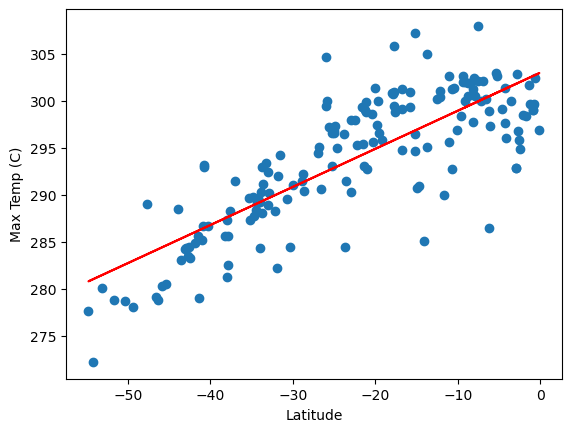

In [70]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", (0, -20))

In [76]:
###  Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23418364871886063


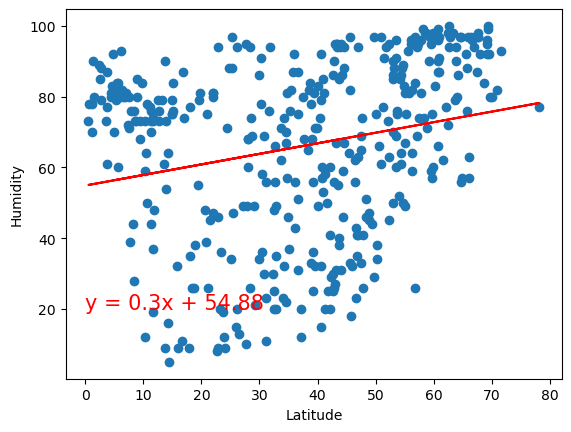

In [81]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", (0, 20))

The r-value is: 0.10698782995971828


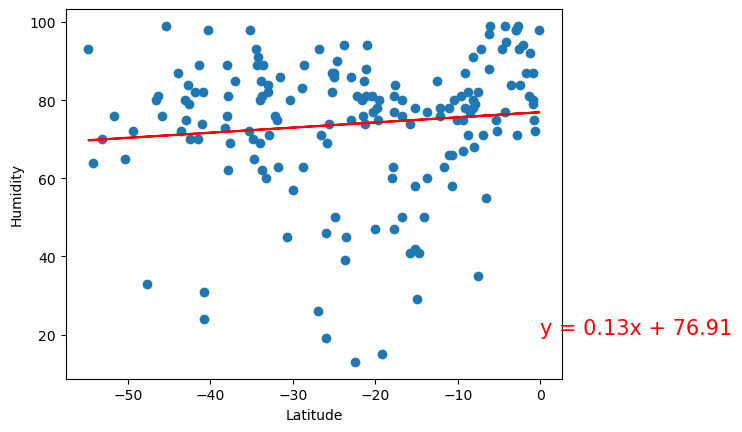

In [82]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", (0, 20))

In [83]:
### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17855590316162775


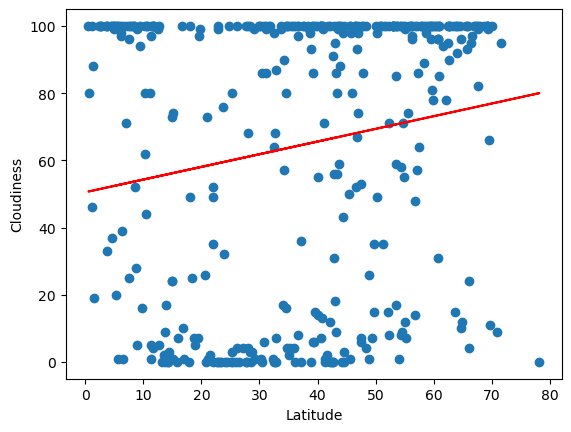

In [79]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (0, -20))

The r-value is: -0.0604593966522881


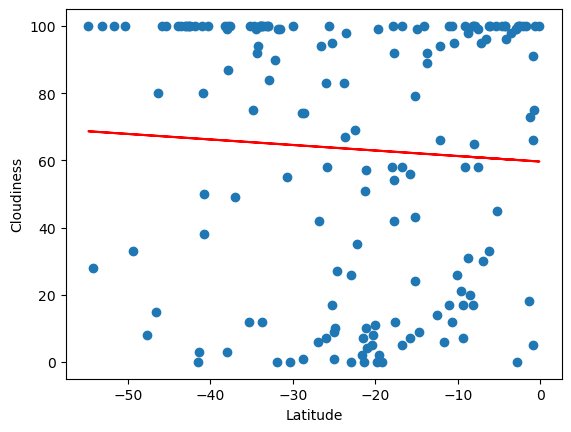

In [84]:
plot_linear_regression(s_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (0, -20))

The r-value is: -0.0604593966522881


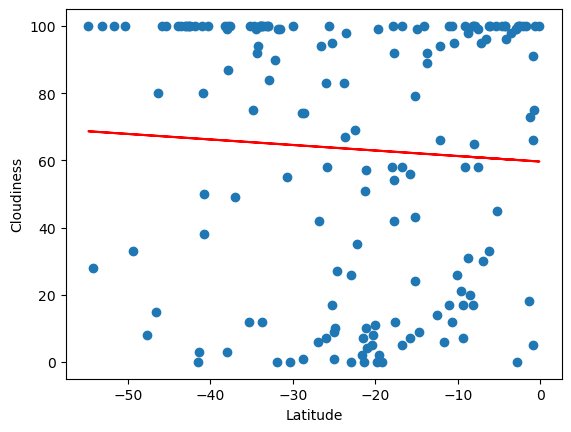

In [84]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (0, -20))

In [ ]:
### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16177414727190606


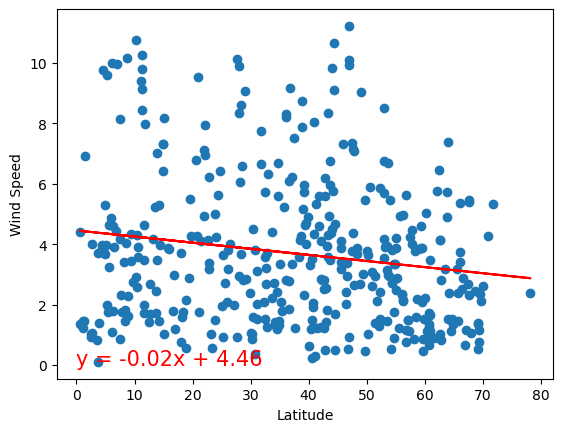

In [85]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (0, 0))

The r-value is: -0.3030252699468529


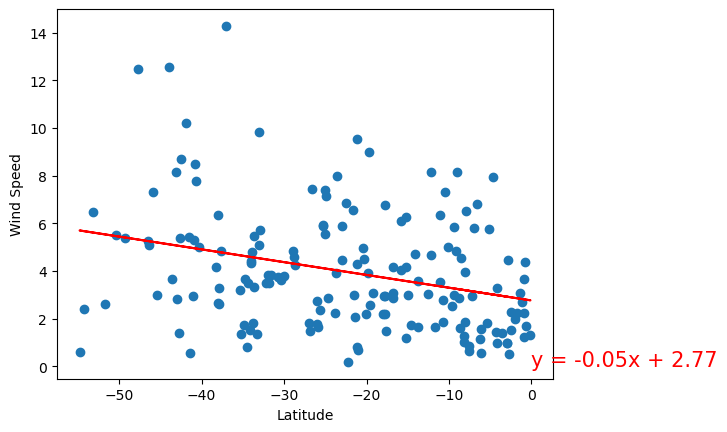

In [86]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (0, 0))